# 1 Read and clean the data

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'g'

In [2]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('/data/project3/train.csv')
test = pd.read_csv('/data/project3/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


## 1.1 Deal with object columns

In [5]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


According to the data discriptions, change yes to 1, no to 0.

dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [6]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [7]:
# Add null Target column to test
test['Target'] = np.nan

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(11), int64(130), object(2)
memory usage: 10.4+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 143 entries, Id to Target
dtypes: float64(12), int64(129), object(2)
memory usage: 26.0+ MB


## 1.2 Dealing with wrong data

We have 4 targets, first let us see the distribution of them.

In [10]:
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

There are 85 households where the family members do not all have the same target.


,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [11]:
#Change the members' target to the same one as host's target
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
     # Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    

There are some households without a host

In [12]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [13]:
# Find households without a head and where labels are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


## 1.3 Dealing wiht missing value

In [14]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Id,0,0.000000
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [15]:
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(test)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
Target,23856,1.000000
rez_esc,19653,0.823818
v18q1,18126,0.759809
v2a1,17403,0.729502
SQBmeaned,31,0.001299
meaneduc,31,0.001299
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


v18q1: number of tablets household owns. So we fill null to 0.

In [16]:
train['v18q1'] = train['v18q1'].fillna(0)
test['v18q1'] = test['v18q1'].fillna(0)

v2a1: Monthly rent payment

Other relevant variables:

tipovivi1, =1 own and fully paid house

tipovivi2, "=1 own,  paying in installments"

tipovivi3, =1 rented

tipovivi4, =1 precarious

tipovivi5, "=1 other(assigned,  borrowed)"


In [17]:
# Variables indicating home ownership
own_variables = [x for x in train if x.startswith('tipo')]
train.loc[train['v2a1'].isnull(), own_variables].sum()

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

There are 5911 household do not have rent because they have their own house. Fill these nunll with 0.

In [18]:
train.loc[train['v2a1'].isnull(), own_variables].sum()

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

In [19]:
train.loc[(train['tipovivi1'] == 1), 'v2a1'] = 0
test.loc[(test['tipovivi1'] == 1), 'v2a1'] = 0

In [20]:
train.loc[train['v2a1'].isnull(), own_variables].sum()

tipovivi1      0
tipovivi2      0
tipovivi3      0
tipovivi4    163
tipovivi5    786
dtype: int64

In [21]:
test.loc[test['v2a1'].isnull(), own_variables].sum()

tipovivi1       0
tipovivi2       0
tipovivi3       0
tipovivi4     434
tipovivi5    2036
dtype: int64

rez_esc: years behind in school, this variable is only defined for individuals between 7 and 19. If the individual is over 19 and they have a missing value, or if they are younger than 7 and have a missing value we can set it to zero. For anyone else, we'll leave the value to be imputed.

In [22]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
train.loc[((train['age'] > 19) | (train['age'] < 7)) & (train['rez_esc'].isnull()), 'rez_esc'] = 0
test.loc[((test['age'] > 19) | (test['age'] < 7)) & (test['rez_esc'].isnull()), 'rez_esc'] = 0

In [23]:
train['rez_esc'].describe()

count    9207.000000
mean        0.081351
std         0.435008
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: rez_esc, dtype: float64

In [24]:
test['rez_esc'].describe()

count    23045.000000
mean         0.077544
std          0.772522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: rez_esc, dtype: float64

In [25]:
test.loc[test['rez_esc'] > 5, 'rez_esc'] = 5

See what is the situation now

In [26]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
v2a1,949,0.099299
rez_esc,350,0.036622
SQBmeaned,5,0.000523
meaneduc,5,0.000523
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000
idhogar,0,0.000000
hogar_nin,0,0.000000


In [27]:
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(test)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
Target,23856,1.000000
v2a1,2470,0.103538
rez_esc,811,0.033996
meaneduc,31,0.001299
SQBmeaned,31,0.001299
instlevel1,0,0.000000
instlevel2,0,0.000000
edjefa,0,0.000000
edjefe,0,0.000000
dependency,0,0.000000


Dealing wiht v2a1 again.
We have already recognize the 0 value, for the rest, we fill it with the mean value.


In [28]:
m_v2a1=train[(train['tipovivi1'] != 1)]['v2a1'].mean()

train.loc[(train['tipovivi1'] != 1), 'v2a1'] = m_v2a1

In [29]:
m_v2a1=test[(test['tipovivi1'] != 1)]['v2a1'].mean()

test.loc[(test['tipovivi1'] != 1), 'v2a1'] = m_v2a1

In [30]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(train)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
rez_esc,350,0.036622
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Id,0,0.000000
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000
idhogar,0,0.000000
hogar_nin,0,0.000000


In [31]:
# Number of missing in each column
missing = pd.DataFrame(test.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(test)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
Target,23856,1.000000
rez_esc,811,0.033996
SQBmeaned,31,0.001299
meaneduc,31,0.001299
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000
idhogar,0,0.000000
hogar_nin,0,0.000000


# 2 Predict the target

## 2.1 NB with no feature selection

In [32]:
train.select_dtypes('object').head()

,Id,idhogar
0,ID_279628684,21eb7fcc1
1,ID_f29eb3ddd,0e5d7a658
2,ID_68de51c94,2c7317ea8
3,ID_d671db89c,2b58d945f
4,ID_d56d6f5f5,2b58d945f


In [33]:
col_drop=['Id','idhogar','SQBmeaned','meaneduc','Target']
train_col = list((train.columns).difference(col_drop))
test_col = list((test.columns).difference(col_drop))
len(train_col)

138

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [35]:
X = pd.DataFrame(train,columns = train_col)
X_test = pd.DataFrame(test,columns = test_col)
y = train['Target']

In [36]:
# Number of missing in each column
missing = pd.DataFrame(X.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(X)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
rez_esc,350,0.036622
SQBage,0,0.000000
parentesco8,0,0.000000
parentesco3,0,0.000000
parentesco4,0,0.000000
parentesco5,0,0.000000
parentesco6,0,0.000000
parentesco7,0,0.000000
parentesco9,0,0.000000
parentesco12,0,0.000000


In [37]:
X.loc[(X['rez_esc'] .isnull()), 'rez_esc'] = 0
X_test.loc[(X_test['rez_esc'] .isnull()), 'rez_esc'] = 0

In [38]:
# Number of missing in each column
missing = pd.DataFrame(X.isnull().sum()).rename(columns = {0: 'total'})
# Create a percentage missing
missing['percent'] = missing['total'] / len(X)
missing.sort_values('percent', ascending = False).head(10)

,total,percent
SQBage,0,0.0
parentesco8,0,0.0
parentesco2,0,0.0
parentesco3,0,0.0
parentesco4,0,0.0
parentesco5,0,0.0
parentesco6,0,0.0
parentesco7,0,0.0
parentesco9,0,0.0
public,0,0.0


In [39]:
nb.fit(X, y)


GaussianNB(priors=None)

In [40]:
X_test.head()

,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBovercrowding,abastaguadentro,abastaguafuera,abastaguano,age,agesq,area1,area2,bedrooms,cielorazo,computer,coopele,dependency,dis,edjefa,edjefe,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,epared1,epared2,epared3,escolari,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,female,hacapo,hacdor,hhsize,hogar_adul,hogar_mayor,hogar_nin,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,male,mobilephone,noelec,overcrowding,paredblolad,pareddes,paredfibras,paredmad,paredother,paredpreb,paredzinc,paredzocalo,parentesco1,parentesco10,parentesco11,parentesco12,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,pisocemento,pisomadera,pisomoscer,pisonatur,pisonotiene,pisoother,planpri,public,qmobilephone,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,refrig,rez_esc,rooms,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,tamhog,tamviv,techocane,techoentrepiso,techootro,techozinc,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
0,16,0.25,0,0,1,9,2.25,1,0,0,4,16,1,0,2,1,1,0,0.5,0,17.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3,2,0,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1,1,2,0,1,1,1,2,3,1,0.0,5,0,1,0,0,0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0.000000
1,1681,0.25,0,256,1,9,2.25,1,0,0,41,1681,1,0,2,1,1,0,0.5,0,17.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,16,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,3,2,0,1,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1.5,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1,1,2,0,1,1,1,2,3,1,0.0,5,0,1,0,0,0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0.000000
2,1681,0.25,0,289,1,9,2.25,1,0,0,41,1681,1,0,2,1,1,0,0.5,0,17.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,17,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,3,2,0,1,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,1,1,2,0,1,1,1,2,3,1,0.0,5,0,1,0,0,0,3,3,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0.000000
3,3481,0.00,256,256,0,1,1.00,1,0,0,59,3481,1,0,1,1,1,0,0.0,0,0.0,16.0,1,0,0,0,0,0,0,1,0,0,0,0,1,16,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,1,1,0,0,0,0,1,1,1,0.0,14,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1.0,0.000000
4,324,64.00,0,121,1,1,0.25,1,0,0,18,324,1,0,2,1,0,0,8.0,0,11.0,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,11,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0.0,4,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1.0,174872.554316


In [41]:
test=X_test[0:1]

In [42]:
Predict=nb.predict(X_test)
p = list(Predict)

In [43]:
test = pd.read_csv('/data/project3/test.csv')
t = list(test['Id'])

In [44]:
from pandas.core.frame import DataFrame
data=DataFrame(p,t)
data.head()
data = pd.DataFrame([t,p]).T
data = data.rename(columns={0:'Id',1:'Target'})
data.to_csv('/data/nb_noFeature.csv', index=False, header= ['Id','Target'] )

## 2.2 kNN classification with no fearure selections

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean') 
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [46]:
knn_prediciton = knn.predict(X_test)
knn_p = list(knn_prediciton)

In [47]:
data = pd.DataFrame([t,p]).T
data = data.rename(columns={0:'Id',1:'Target'})
data.to_csv('/data/knn_noFeature.csv', index=False, header= ['Id','Target'] )

## 2.2 chi2 with feature selection

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [50]:
Predict_new = SelectKBest(chi2, k=30)
X_new=Predict_new.fit_transform(X, y)


In [51]:
train_set = Predict_new.fit_transform(X,y)
test_set = Predict_new.transform(X_test)

In [52]:
test_set[0]

array([16.  ,  0.25,  0.  ,  0.  ,  1.  ,  9.  ,  2.25,  4.  , 16.  ,
        1.  ,  0.5 , 17.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  1.5 ,  0.  ,  2.  ,  1.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  0.  ])

# 3 Score

## 3.1 nb score

Overall accuracy:

In [85]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
print X_train.shape
print X_test.shape

print y_train.shape
print y_test.shape

(7645, 138)
(1912, 138)
(7645,)
(1912,)


In [86]:
classifier_nb = nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)
y_pred_nb

array([4, 1, 4, ..., 4, 4, 3])

In [87]:
classifier_nb.score(X_test, y_test)

0.6239539748953975

A more comprehensive accuracy report:

In [88]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred_nb)

             precision    recall  f1-score   support

          1       0.31      0.17      0.22       157
          2       0.35      0.36      0.35       317
          3       0.22      0.10      0.14       233
          4       0.73      0.86      0.79      1205

avg / total       0.57      0.62      0.59      1912



In [89]:
print metrics.confusion_matrix(y_test, y_pred_nb)

[[  26   46    5   80]
 [  22  113   29  153]
 [   7   64   23  139]
 [  28  100   46 1031]]


Cross_validation:

In [100]:
from sklearn.cross_validation import cross_val_score
classifier_nb = GaussianNB()
scores_nb = cross_val_score(classifier_nb, X, y, cv=10, scoring='accuracy')
scores_nb

array([0.59185804, 0.65621735, 0.59874608, 0.57471264, 0.63874346,
       0.61989529, 0.62617801, 0.63664921, 0.59224319, 0.61844864])

In [101]:
print 'mean is: ', scores_nb.mean()
print 'STD is: ', scores_nb.std()

mean is:  0.6153691901119429
STD is:  0.024148365474375957


## 3.2 knn score & find the best k value

Overall accuracy:

In [102]:
classifier_knn = knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)
y_pred_knn

array([4, 4, 4, ..., 4, 4, 4])

In [103]:
classifier_knn.score(X_test, y_test)

0.6312761506276151

A more comprehensive accuracy report:

In [104]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred_knn)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00       157
          2       0.33      0.01      0.02       317
          3       0.00      0.00      0.00       233
          4       0.63      1.00      0.77      1205

avg / total       0.45      0.63      0.49      1912



/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The confusion matrix:

In [105]:
print metrics.confusion_matrix(y_test, y_pred_knn)

[[   0    5    0  152]
 [   0    3    0  314]
 [   0    0    0  233]
 [   0    1    0 1204]]


Cross_validation:

In [106]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
classifier_knn =KNeighborsClassifier()
scores_knn = cross_val_score(classifier_knn, X, y, cv=10, scoring='accuracy')
scores_knn

array([0.54592902, 0.59038662, 0.58725183, 0.54127482, 0.58848168,
       0.59685864, 0.55602094, 0.56439791, 0.56813417, 0.5293501 ])

In [107]:
print 'mean is: ', scores_knn.mean()
print 'STD is: ', scores_knn.std()

mean is:  0.5668085728459777
STD is:  0.022274622023357424


Find the best k value:

In [72]:
import matplotlib.pyplot as plt 
k_range = range(1, 138)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

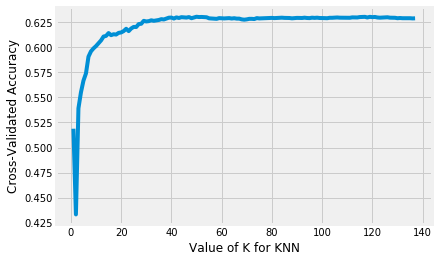

In [73]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

From the above graph we can see that, when k is larger than 40, the score stays at the highest level of around 0.625.